<a href="https://colab.research.google.com/github/akutayaydin/Medical-Sarcopenia-Model/blob/main/Sarcopenia_Model_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The Scope of this project is to find a way(s) to identify Sarcopenia patients?

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

In [2]:
# Mount and Access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# DATA COLLECTION #

In [4]:
df = pd.read_csv("/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Patients.csv")

In [5]:
#df

In [6]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 43)
Columns: Index(['0', 'MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       'DM drug', 'Dyslipidemia', 'Dyslipidemia duration', 'Statin', 'KAH ',
       'KAH duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'Dıration of HT', 'N_HT', 'HT drugs', 'Duration of 1HT',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS.1', 'Star',
       'BMI', 'Sarcopenia', 'Gender', 'Ad'],
      dtype='object')


In [7]:
# DATA PREPROCESSING STARTS HERE

In [8]:
# Remove not relevant columns
df = df.drop('0', axis =1)
df = df.drop('Ad', axis =1)

# Rename turkish column names and spaces
df = df.rename(columns = {'İnsülin':'Insulin', 'Dyslipidemia duration': 'Dyslipidemia_Duration','DM duration': 'DM_Duration','DM drug': 'DM_Drug','KAH duration': 'KAH_Duration','Dıration of HT': 'HT_Duration', 'HT drugs': 'HT_Drugs','Duration of 1HT':'1HT_Duration','GS.1': 'GS_1','Weight ':'Weight','Height ':'Height','Waist ':'Waist', ' Smoking (packet/year)': 'Smoking_Packets_Per_Year',' Alcohol':'Alcohol','DM ': 'DM','KAH ':'KAH','  Alcohol':'Alcohol'})

In [9]:
# CONVERT COLUMNS TO NUMERIC DATA TYPES

columns_to_check = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI','OP'
]

# Convert the values in the specified column to numeric data types
for col in columns_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['Egz'] = df['Egz'].replace(' 1-2/week','1-2/week')

In [10]:
objects_col = df.select_dtypes(include = ['object'])
objects_col.columns

Index(['Alcohol', 'DM_Drug', 'Statin', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender'],
      dtype='object')

In [11]:
objects_num = df.select_dtypes(include = [np.number])
objects_num.columns

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'DM', 'DM_Duration', 'Insulin',
       'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH', 'KAH_Duration',
       'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'HT', 'HT_Duration', 'N_HT',
       '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'Sarcopenia'],
      dtype='object')

In [12]:
print('Shape: ' + str(df.shape))
print('Columns: ' + str(df.columns))

Shape: (5016, 41)
Columns: Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'Alcohol', 'DM', 'DM_Duration', 'Insulin',
       'DM_Drug', 'Dyslipidemia', 'Dyslipidemia_Duration', 'Statin', 'KAH',
       'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'HT_Duration', 'N_HT', 'HT_Drugs', '1HT_Duration',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS_1', 'Star',
       'BMI', 'Sarcopenia', 'Gender'],
      dtype='object')


In [13]:
# LOOK FOR OUTLIERS
df.describe().T

# Normalization will be completed as part of pipeline StandardScaler

,count,mean,std,min,25%,50%,75%,max
MMSE,4115.0,27.620656,2.859489,9.00,27.00,28.00,30.00,30.00
Age,5015.0,61.996810,9.696511,42.00,54.00,62.00,69.00,95.00
Weight,5007.0,76.580188,13.711160,34.00,67.00,76.00,85.00,137.00
Height,5007.0,160.495906,9.034135,125.00,155.00,160.00,166.00,260.00
Waist,4903.0,98.171936,19.209012,0.00,90.00,98.00,106.00,915.00
Hip,4905.0,111.008155,14.486069,0.00,102.00,109.00,117.00,191.00
Smoking,5016.0,0.320375,0.466667,0.00,0.00,0.00,1.00,1.00
Smoking_Packets_Per_Year,5014.0,8.190666,16.073376,0.00,0.00,0.00,10.00,150.00
DM,5014.0,0.304547,0.460261,0.00,0.00,0.00,1.00,1.00
DM_Duration,4929.0,3.123554,6.536226,0.00,0.00,0.00,2.00,40.00


In [14]:
# HANDLE MISCALCULATED BMI #V2
# Instead of recalculating BMI. I removed BMI values with high differences.

In [15]:
df ['Height_Meter_Square'] = (df ['Height'] / 100) ** 2
df ['Height_Meter_Square'] = df ['Height_Meter_Square'].round(2)
df ['BMI_Calc'] = df ['Weight'] / df ['Height_Meter_Square']

df = df.drop(columns = 'Height_Meter_Square')
df = df.round(2)

df ['BMI_Diff'] = df ['BMI'] - df ['BMI_Calc']
df ['BMI_Diff'] = df ['BMI_Diff'].abs()

df = df [df ['BMI_Diff'] < 0.5] # Threshold can be changed

In [16]:
df.shape #5016 (Initial # of Data) >>4916

(4916, 43)

In [17]:
# CREATE A NEW FEATURE: BMI_CAT will be created to improve model's performance

In [18]:
df['BMI_Cat'] = ''

In [19]:
df.loc [df['BMI'] < 18.5, 'BMI_Cat'] = 'Underweight'
df.loc[(df['BMI']>= 18.5) & (df['BMI']<= 24.99),'BMI_Cat'] = 'Normalweight'
df.loc[(df['BMI']>= 25) & (df['BMI']<= 29.99),'BMI_Cat'] = 'Overweight'
df.loc[(df['BMI']>= 30) & (df['BMI']<= 39.99),'BMI_Cat'] = 'Obesity'
df.loc[df['BMI']>= 40,'BMI_Cat'] = 'MorbidObesity'

In [20]:
# What % of each BMT category is Sarcopenia
(df.groupby('BMI_Cat')['Sarcopenia'].sum() / df.groupby('BMI_Cat')['Sarcopenia'].count()).round(2)

BMI_Cat
MorbidObesity    0.43
Normalweight     0.12
Obesity          0.25
Overweight       0.16
Underweight      0.27
Name: Sarcopenia, dtype: float64

In [21]:
# Label Encoding for Categorical Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'DM_Drug', 'Statin', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']

for col in columns_to_encode:
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [22]:
# FEATURE ENGINEERING #


1.   **'MMSE'**, Mini-Mental State Examination, a test used to assess cognitive impairment and dementia
1.   **'Waist'**, waist circumference
1.   **'Hip'**, hip circumference
1.   **'DM'**, individual has diabetes or not
1.   **'DM_Duration'**, length of time the individual has had diabetes
1.   **'Insulin'**, Is individual taking insulin
1.   **'DM_Drug'**, medications or drugs used to manage diabetes
1.   **'Dyslipidemia'**, cholesterol levels
1.   **'Statin'**, statin medications to manage dyslipidemia
1.   **'KAH'**, coronary artery disease
1.   **'Hipotiroidi'**, underactive thyroid gland
1.   **'KOAH'**, Chronic Obstructive Pulmonary Disease (Kronik Obstrüktif Akciğer Hastalığı)
1.   **'OP'**, osteoporosis (Kemik Erimesi)
1.   **'HT'**, high blood pressure
1.   **'N_HT'**, number of medications or drugs taken for hypertension???
1.   **'1HT_Duration'**, duration of time since the first diagnosis of hypertension.???
1.   **'Status'**, Maritial Status
1.   **'Egz'**, exercise or physical activity indicator
1.   **'AT'**, ???
1.   **'CST'**, CHAIR STAND TEST??
1.   **'GS'**, Gait speed(walk test)
1.   **'GS_1'**, grip strength
1.   **'Star'**, sonographic thigh adjustment ratio
1.   **'BMI'**, Body Mass Index
1.   **'OP'**, Osteoporosis




In [23]:
# Correlation Matrix
# Look for correlation between numerical and encoded parameters

num_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'OP',
    'Alcohol_encoded', 'DM_Drug_encoded', 'Statin_encoded', 'OTHERS_encoded', 'Type_HT_encoded', 'HT_Drugs_encoded',
    'Education_encoded', 'Job_encoded', 'Status_encoded', 'Egz_encoded', 'Gender_encoded','BMI_Cat_encoded','Sarcopenia']

num_df = pd.DataFrame()

for col in num_columns:
  num_df[col] = df[col]

corr = num_df.corr()
corr

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,OTHERS_encoded,Type_HT_encoded,HT_Drugs_encoded,Education_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded,BMI_Cat_encoded,Sarcopenia
MMSE,1.000000,-0.230984,0.052458,0.180171,-0.008078,-0.071179,0.165081,0.118643,-0.070848,-0.068875,...,-0.029287,0.036702,0.040488,-0.214904,-0.004296,0.119213,0.136216,0.136905,-0.006773,-0.068908
Age,-0.230984,1.000000,-0.106895,-0.200345,0.100635,0.036903,-0.049404,0.045358,0.155243,0.210446,...,-0.160562,-0.065831,-0.150219,0.072885,0.109049,0.024966,0.005874,0.096963,0.008630,0.335478
Weight,0.052458,-0.106895,1.000000,0.352689,0.468224,0.508111,0.074684,0.074366,0.132094,0.066239,...,-0.032673,-0.137123,-0.088753,-0.027114,0.048341,0.011218,-0.089292,0.244970,-0.137900,0.129446
Height,0.180171,-0.200345,0.352689,1.000000,0.061637,-0.096231,0.268220,0.258287,-0.089623,-0.112329,...,-0.061580,0.028068,0.071271,-0.053608,0.112655,-0.050915,0.130718,0.660529,0.096863,-0.085459
Waist,-0.008078,0.100635,0.468224,0.061637,1.000000,0.233849,0.008179,0.033908,0.122302,0.089815,...,-0.034836,-0.132383,-0.091449,0.010696,0.020891,0.017493,-0.054862,0.109902,-0.083073,0.134811
Hip,-0.071179,0.036903,0.508111,-0.096231,0.233849,1.000000,-0.074152,-0.074424,0.123176,0.110957,...,0.000320,-0.024508,-0.083004,-0.000455,-0.023035,0.038891,-0.123783,-0.154337,-0.136818,0.131381
Smoking,0.165081,-0.049404,0.074684,0.268220,0.008179,-0.074152,1.000000,0.735076,0.009275,-0.015910,...,-0.090405,-0.060156,-0.006645,-0.118842,0.057957,-0.008187,0.084569,0.344866,0.016112,-0.023803
Smoking_Packets_Per_Year,0.118643,0.045358,0.074366,0.258287,0.033908,-0.074424,0.735076,1.000000,0.033792,0.005007,...,-0.076845,-0.070417,-0.019273,-0.113301,0.063232,-0.019083,0.060355,0.378898,0.001671,0.012891
DM,-0.070848,0.155243,0.132094,-0.089623,0.122302,0.123176,0.009275,0.033792,1.000000,0.737096,...,0.005721,-0.168218,-0.171937,-0.009301,0.016577,0.010155,-0.075248,0.000626,-0.031175,0.107134
DM_Duration,-0.068875,0.210446,0.066239,-0.112329,0.089815,0.110957,-0.015910,0.005007,0.737096,1.000000,...,0.021521,-0.114292,-0.146895,0.032115,0.006024,0.024755,-0.056533,-0.016062,-0.033792,0.150241


<Figure size 960x720 with 0 Axes>

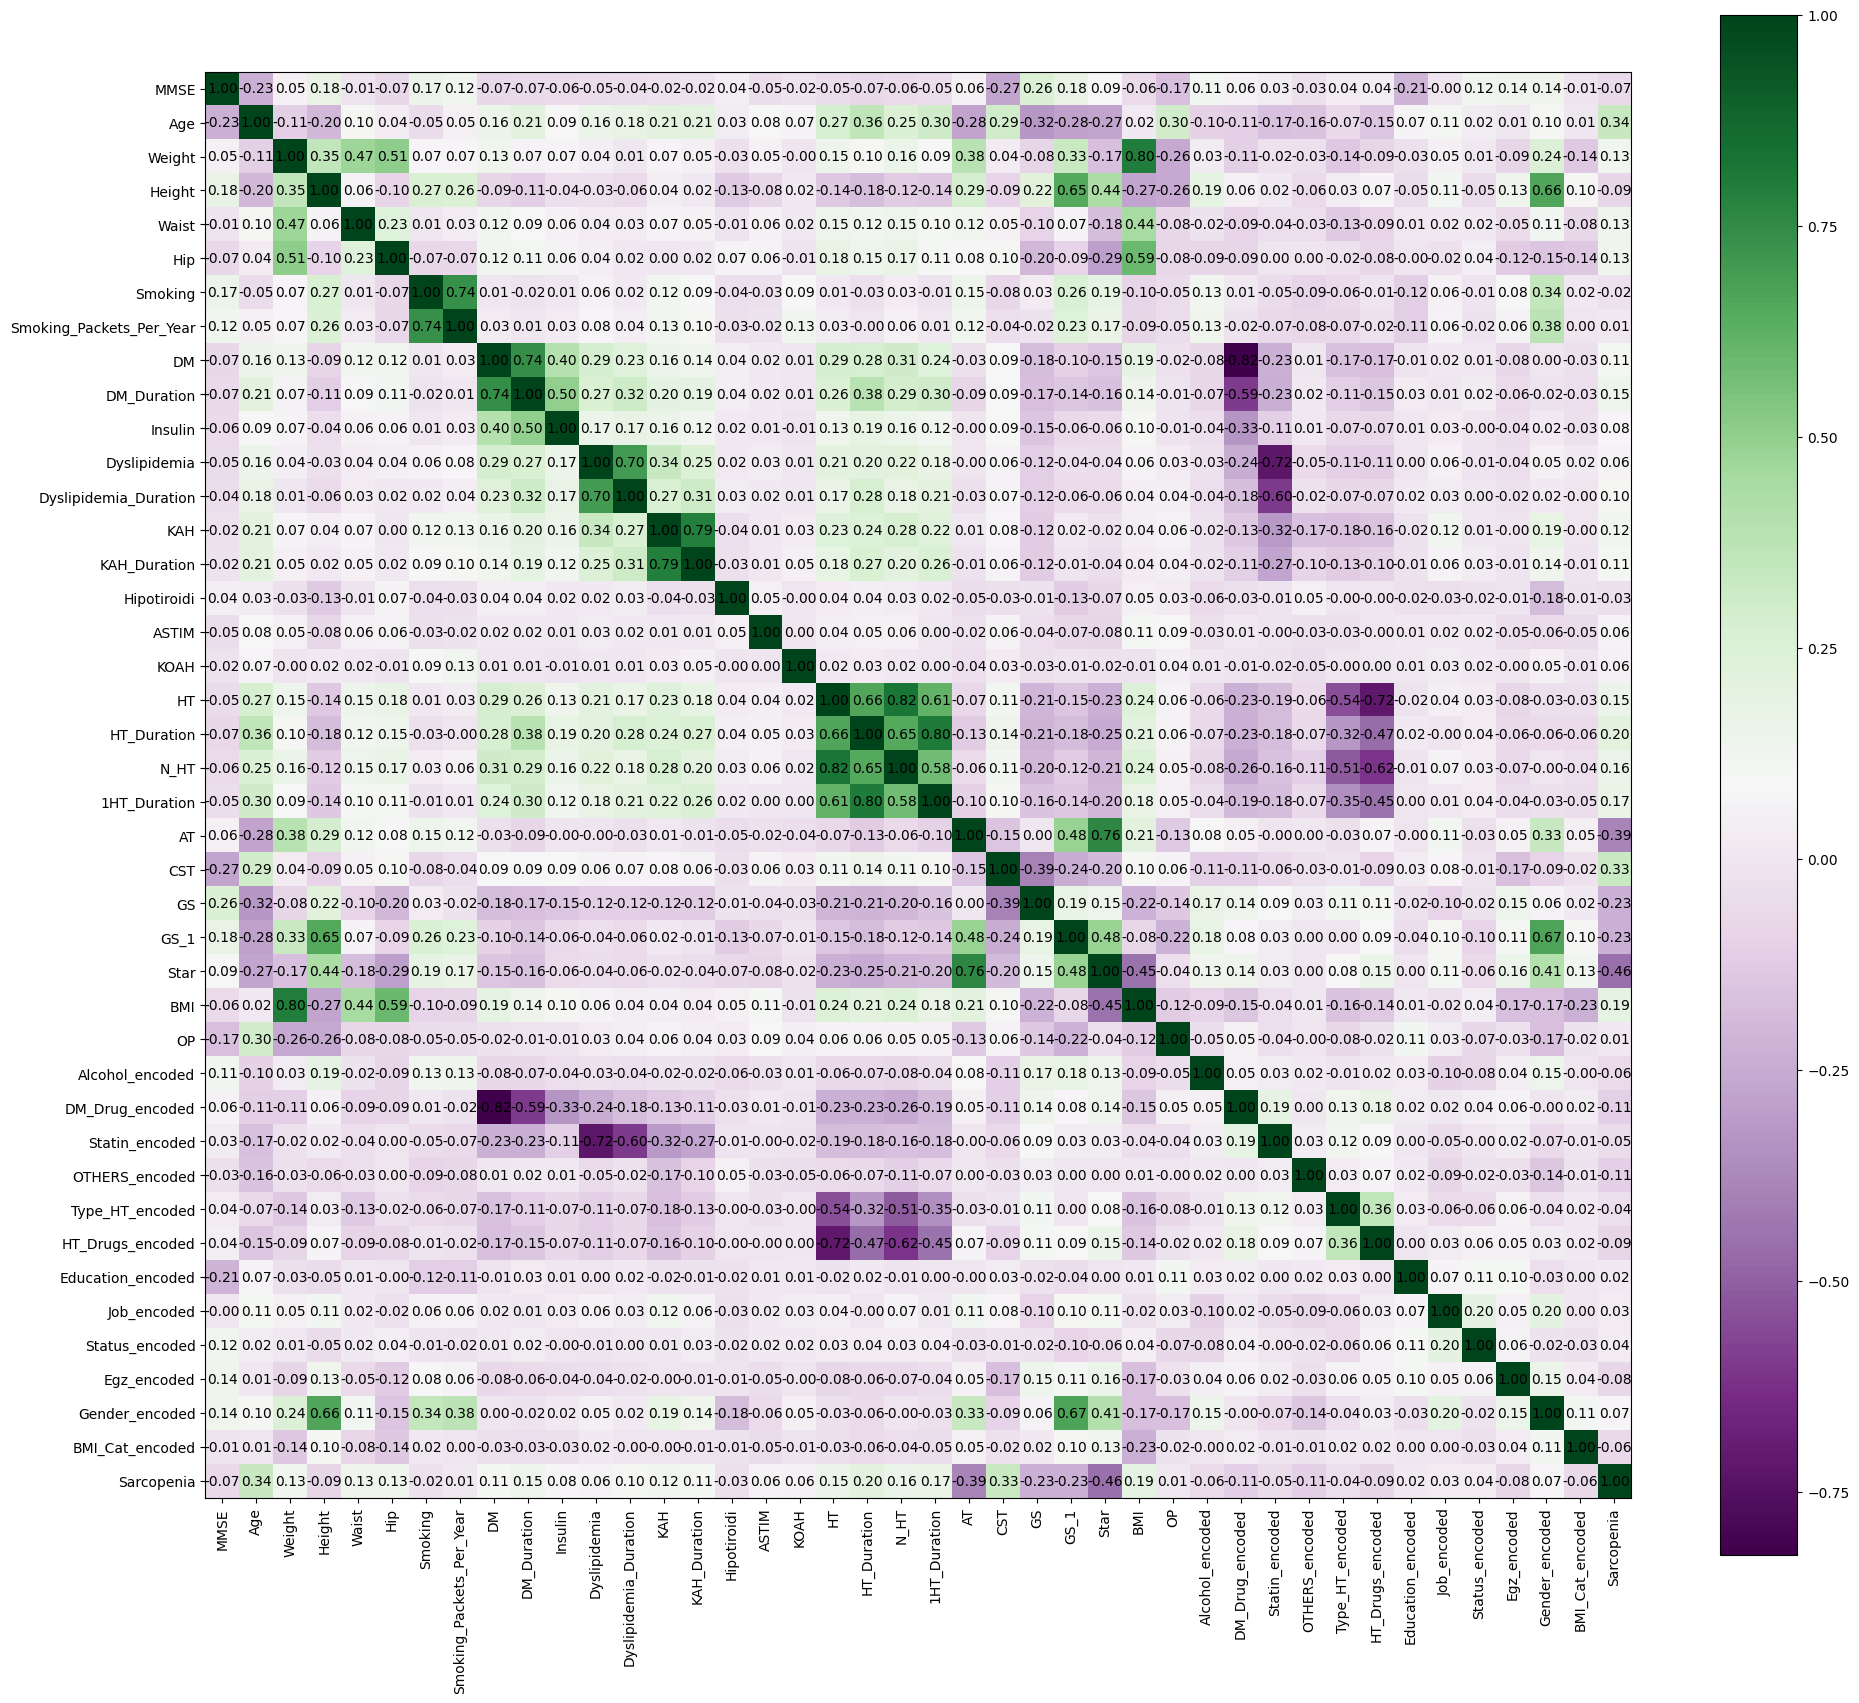

In [24]:
# Data Visualization
# Draw heatmap to see correlation
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.figure(figsize=(23,20))

plt.imshow(corr,cmap = 'PRGn')
cbar = plt.colorbar(spacing='uniform')

plt.xticks(range(len(corr)),labels =corr.columns,rotation = 90)
plt.yticks(range(len(corr)),labels = corr.columns)

# Add text annotations for correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Conclusion:
# Positive Correlation: Age, CST,
# Weak Positive Correlation: BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

plt.savefig('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/corr_output.png', format = 'png', dpi = 300)

In [33]:
# What is the impact of age to Sarcopenia
import plotly.express as px

# Above 60 years old there is higher chance of becoming Sarcopenia.
# In the dataset for the ages between 40-60, 8% of the population is Sarcopenia
#                for the ages betweeb 60-80, 25% of the population is Sarcopenia
# There is a direct relationship between Age and Sarcopenia

fig = px.histogram(df, x='Age', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Age',
                   labels={'Age': 'Age', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', barmode='overlay')

fig.show()


In [188]:

# What is the impact of MMSE to Sarcopenia
import plotly.express as px

# When MMSE score is lower there is a higher chance of becoming Sarcopenia.
# In the dataset if MMSE score is between 20-24 1/4 of the population is Sarcopenia
#                if MMSE score is between 25-30 1/5 of the population is Sarcopenia
# There is a negative correleration between MMSE and Sarcopenia

fig = px.histogram(df, x='MMSE', color='Sarcopenia',
                   title='Distribution of Sarcopenia by MMSE',
                   labels={'MMSE': 'MMSE', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='MMSE', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [189]:
# What is the impact of BMI to Sarcopenia
import plotly.express as px

# When BMI score is higher there is a higher chance of becoming Sarcopenia.
# In the dataset if BMI is between 30-39.9 1/4 of the population is Sarcopenia
#                if BMI is between 40-49.9 almost 1/2 of the population is Sarcopenia
# There is a positive correleration between BMI and Sarcopenia

fig = px.histogram(df, x='BMI', color='Sarcopenia',
                   title='Distribution of Sarcopenia by BMI',
                   labels={'BMI': 'BMI', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for age groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='BMI', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [190]:
# What is the impact of OP to Sarcopenia
import plotly.express as px

# OP = 0 or OP = 1 the impact is somewhat same. Not a good determinator.
fig = px.histogram(df, x='OP', color='Sarcopenia',
                   title='Distribution of Sarcopenia by OP',
                   labels={'OP': 'OP', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='OP', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [191]:
# What is the impact of HT to Sarcopenia
import plotly.express as px

# If the patience has HT there is higher chance of becoming Sarcopenia
fig = px.histogram(df, x='HT', color='Sarcopenia',
                   title='Distribution of Sarcopenia by HT',
                   labels={'HT': 'HT', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='HT', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [193]:
# What is the impact of Egz to Sarcopenia
import plotly.express as px

# If you dont do exercise you have higher chance for Sarcopenia
# Used this feature but the results got worse

fig = px.histogram(df, x='Egz', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Egz',
                   labels={'Egz': 'Egz', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Egz', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [194]:
# What is the impact of Star to Sarcopenia
import plotly.express as px

# If star is less than 1 you have higher chance of Sarcopenia

fig = px.histogram(df, x='Star', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Star',
                   labels={'Star': 'Star', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Star', yaxis_title='Frequency', barmode='overlay')

fig.show()

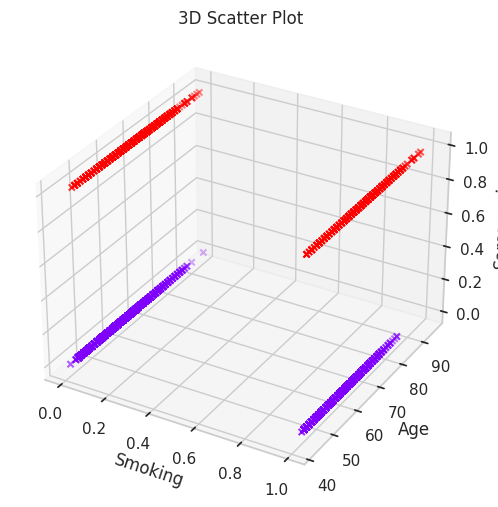

In [148]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = df['Sarcopenia']


ax.scatter(df['Smoking'], df['Age'], df['Sarcopenia'], c=colors, marker='x', cmap='rainbow')

ax.set_xlabel('Smoking')
ax.set_ylabel('Age')
ax.set_zlabel('Sarcopenia')

plt.title('3D Scatter Plot')

plt.show()


In [157]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

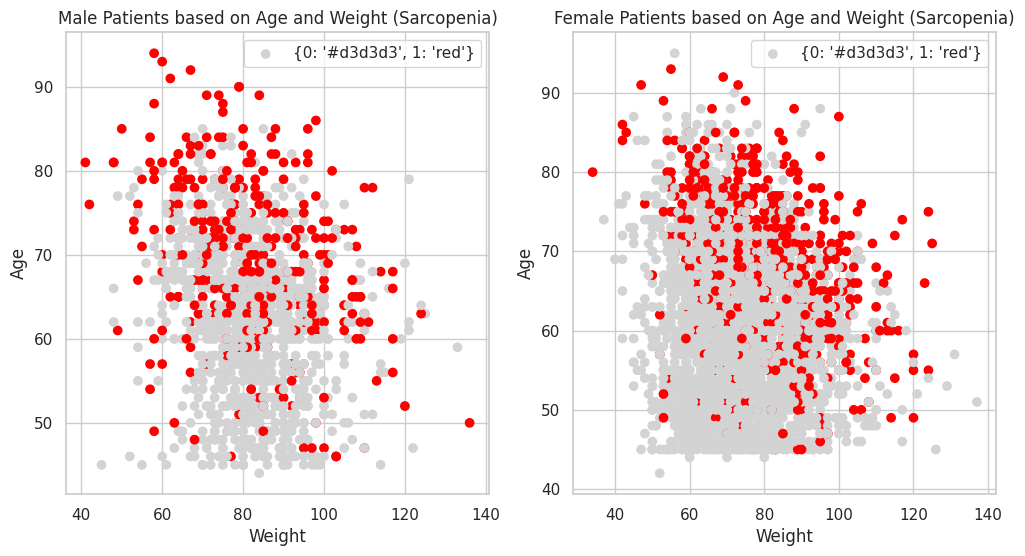

In [182]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axis = plt.subplots(1,2,figsize = (12,6))

df_male = df[df['Gender']== 'M']
df_female = df[df['Gender']== 'F']

colormap = {0: '#d3d3d3', 1: 'red'}

axis[0].scatter(x = df_male['Weight'], y = df_male['Age'], c=[colormap[cat] for cat in df_male['Sarcopenia']], marker = 'o', label = colormap)
axis[0].set_xlabel('Weight')
axis[0].set_ylabel('Age')
axis[0].set_title('Male Patients based on Age and Weight (Sarcopenia)')
axis[0].legend()

axis[1].scatter(x = df_female['Weight'], y = df_female['Age'], c=[colormap[cat] for cat in df_female['Sarcopenia']], marker = 'o', label = colormap)
axis[1].set_xlabel('Weight')
axis[1].set_ylabel('Age')
axis[1].set_title('Female Patients based on Age and Weight (Sarcopenia)')
axis[1].legend()

# Both Female and Male Sarcopenia patients loose weight as they get older


In [34]:
# DATA SET PREPRATION / PREPROCESSING #

In [28]:
# HANDLE MISSING DATA & Drop null data points
filter_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','BMI_Cat_encoded','Sarcopenia',
    'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded',
    'Job_encoded','Status_encoded','Egz_encoded','Gender_encoded']

cleaned_df = pd.DataFrame()

#for col in filter_columns:
  #cleaned_df[col] = df[col].dropna().reset_index(drop=True)

for col in filter_columns:
  cleaned_df[col] = df[col]

# If no medication used replace it with None
cleaned_df['Statin'] = cleaned_df['Statin'].fillna('None')
cleaned_df['OTHERS'] = cleaned_df['OTHERS'].fillna('None')
cleaned_df['DM_Drug'] = cleaned_df['DM_Drug'].fillna('None')
cleaned_df['Type_HT'] = cleaned_df['Type_HT'].fillna('None')
cleaned_df['HT_Drugs'] = cleaned_df['HT_Drugs'].fillna('None')

cleaned_df['Education'] = cleaned_df['Education'].fillna('None')
cleaned_df['Job'] = cleaned_df['Job'].fillna('None')
cleaned_df['Status'] = cleaned_df['Status'].fillna('None')

cleaned_df['Smoking_Packets_Per_Year'] = cleaned_df['Smoking_Packets_Per_Year'].fillna(-1)
cleaned_df['Dyslipidemia_Duration'] = cleaned_df['Dyslipidemia_Duration'].fillna(-1)

cleaned_df['KAH_Duration'] = cleaned_df['KAH_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['HT_Duration'] = cleaned_df['HT_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['DM_Duration'] = cleaned_df['DM_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['1HT_Duration'] = cleaned_df['1HT_Duration'].fillna(-1) # Replace empty values with -1

cleaned_df['OP'] = cleaned_df['OP'].fillna(-1) # Replace empty values with -1
cleaned_df['Egz'] = cleaned_df['Egz'].fillna(-1) # Replace empty values with -1
cleaned_df['MMSE'] = cleaned_df['MMSE'].fillna(-1) # Replace empty values with -1
cleaned_df['Hip'] = cleaned_df['Hip'].fillna(-1) # Replace empty values with -1
cleaned_df['Waist'] = cleaned_df['Waist'].fillna(-1) # Replace empty values with -1
cleaned_df['N_HT'] = cleaned_df['N_HT'].fillna(-1) # Replace empty values with -1

# Delete the rest of the missing data
cleaned_df = cleaned_df.dropna().reset_index(drop=True)

In [29]:
cleaned_df = cleaned_df[[
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','BMI_Cat_encoded','Sarcopenia',
    'Alcohol_encoded','Statin_encoded', 'OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded','Egz_encoded','Gender_encoded']]

In [30]:
cleaned_df

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,BMI_Cat_encoded,Sarcopenia,Alcohol_encoded,Statin_encoded,OTHERS_encoded,Type_HT_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,1.0,10.0,...,3,0,5,23,20,58,285,13,3,1
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,0.0,0.0,...,2,1,5,23,31,80,160,13,1,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0.0,0.0,...,2,0,0,23,484,80,101,13,3,1
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0.0,0.0,...,3,0,0,23,264,38,7,13,2,0
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0.0,0.0,...,2,0,0,23,235,54,103,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,30.0,70.0,73.0,143.0,103.0,111.0,0,0.0,1.0,-1.0,...,2,1,0,23,78,80,229,27,1,0
4864,29.0,72.0,78.0,160.0,100.0,108.0,0,0.0,0.0,0.0,...,2,0,0,6,452,80,229,27,3,0
4865,30.0,79.0,95.0,180.0,100.0,114.0,0,0.0,0.0,0.0,...,3,0,0,6,135,80,248,27,1,1
4866,30.0,85.0,96.0,161.0,106.0,107.0,0,0.0,0.0,0.0,...,2,1,0,6,264,80,248,27,1,1


In [38]:
rows_with_missing_values = cleaned_df[cleaned_df.isna().any(axis=1)]
rows_with_missing_values

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,BMI_Cat_encoded,Sarcopenia,Alcohol_encoded,Statin_encoded,OTHERS_encoded,Type_HT_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded


In [43]:
# MODEL SELECTION #

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [45]:
steps_num = [('imputer', SimpleImputer(strategy = 'mean')),
             ('scaler', StandardScaler())] # Use the Scaler to normalize data

steps_cat = [('imputer', SimpleImputer(strategy ='most_frequent')),
             ('oneHot', OneHotEncoder(handle_unknown='ignore'))]

numeric_transformator = Pipeline(steps = steps_num)

numeric_features = ['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI']

categoric_transformer = Pipeline(steps = steps_cat)

categoric_features =['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']


# Positive Correlation: Age, CST,
# Weak Positive Correlation: MMSE, BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

In [46]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformator, numeric_features ),
                                                 ('cat', categoric_transformer, categoric_features)])


# **Test the data with the Logistic Regression Model**

In [47]:
log_model = Pipeline(steps = [('preprocessor', preprocessor),
                        ('regression', LogisticRegression())]
               )

In [49]:
# Test with the full data set instead of cleaned dataframe
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

In [50]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [51]:
log_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...on',
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender',
                                                   'BMI_Cat'])])),
                ('regression', LogisticRegression())])

In [52]:
y_pred = log_model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [54]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')

print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.90 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.83 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.69 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.75 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 739
Confusin Matrix Score TP: 148
Confusin Matrix Score FP: 30
Confusin Matrix Score FN: 67


In [55]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       769
           1       0.83      0.69      0.75       215

    accuracy                           0.90       984
   macro avg       0.87      0.82      0.85       984
weighted avg       0.90      0.90      0.90       984



##  Test the data with XGBOOST Model

XGboost combines the prediction of multiple decision trees.

*   It has better predictive accuracy compare to decision tree
*   It reduces the risk of overfitting and bias that can occur with a single decision tree. It uses regularization techniques.
*   It sequentially adds trees to the model with each tree correcting errors of previous ones.
*   It was designed to be used with large and complicated data sets. It can handle both small and large data sets.





In [63]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [57]:
xgb_model = Pipeline(steps=[('preprocessor',preprocessor),('xgb',xgb.XGBClassifier())])

In [58]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [59]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [60]:
y_pred = xgb_model.predict(X_test)

In [61]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 1.00 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 1.00 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.99 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 1.00 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 769
Confusin Matrix Score TP: 213
Confusin Matrix Score FP: 0
Confusin Matrix Score FN: 2


In [64]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='recall')
print(f'CV Score Mean: {cv_scores.mean():.5f}')
print(f'CV Score Std Deviation: {cv_scores.std():.5f}')

CV Score Mean: 0.99049
CV Score Std Deviation: 0.00833


In [65]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      0.99      1.00       215

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



In [66]:
# Access the feature importances
importances = xgb_model.named_steps['xgb'].feature_importances_

# Map importances to feature names for better understanding
feature_names = df.columns
feature_importance_dict = dict(zip(feature_names, importances))

In [67]:
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key = lambda x: x[1],reverse = True))

In [68]:
for key, value in sorted_feature_importance_dict.items():
  if value > 0:
    print(f'{key}: {value:.4f}')

N_HT: 0.4678
HT_Duration: 0.1905
HT: 0.1690
OTHERS: 0.0077
Dyslipidemia_Duration: 0.0067
DM: 0.0029
Age: 0.0020
Smoking_Packets_Per_Year: 0.0018
Height: 0.0016
OP: 0.0011
Waist: 0.0005
MMSE: 0.0005
HT_Drugs: 0.0004
Weight: 0.0004
Hip: 0.0003
Type_HT: 0.0001


In [69]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_columns)

44

In [70]:
# Create an Inclusion Table (feature, recall score and Confusion Matrix values)
# Used Greedy Forward Search for feature selection

In [71]:
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import xgboost as xgb

import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

features = ['MMSE',
 'Age','Weight','Height','Waist','Hip','Smoking','Smoking_Packets_Per_Year','DM','DM_Duration','Insulin',
 'Dyslipidemia','Dyslipidemia_Duration','KAH','KAH_Duration','Hipotiroidi', 'ASTIM', 'KOAH', 'HT',
 'HT_Duration','N_HT', '1HT_Duration', 'AT', 'CST','GS','GS_1','Star','BMI','OP',
 'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded',
 'Egz_encoded','Gender_encoded','BMI_Cat_encoded']

y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

# Initialize an empty set for selected features
selected_features = set()

# Define the number of features to select
num_features_to_select = 15  # You can change this value as needed

k = 5  # Number of folds

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Selected_Features', 'Recall','CV_Score_Mean','CV_Score_Deviation','TN','TP','FP','FN'])

while len(selected_features) < num_features_to_select:
    best_feature = None
    best_recall = 0.0

    for feature in set(features) - selected_features:
        current_features = list(selected_features) + [feature]
        X_subset = X[current_features]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

        # Train an XGBoost model
        xgb_model = xgb.XGBClassifier()
        xgb_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_model.predict(X_test)

        # Calculate recall score
        recall = recall_score(y_test, y_pred)

        if recall > best_recall:
            best_recall = recall
            best_feature = feature
            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            cv_scores = cross_val_score(xgb_model, X_subset, y, cv=kf, scoring='recall')
            confusion = confusion_matrix(y_test,y_pred)

    if best_feature is not None:
      selected_features.add(best_feature)
      results_df = results_df.append({'Selected_Features': ', '.join(selected_features), 'Recall': best_recall, 'CV_Score_Mean': cv_scores.mean(), 'CV_Score_Deviation': cv_scores.std(),'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}, ignore_index=True)

# Print the selected features and their corresponding recall scores
print(results_df)



                                    Selected_Features    Recall  \
0                                                Star  0.665116   
1                                Gender_encoded, Star  0.767442   
2                           Gender_encoded, CST, Star  0.827907   
3                     GS_1, Gender_encoded, CST, Star  0.990698   
4                Hip, CST, Gender_encoded, Star, GS_1  0.990698   
5   Hip, Hipotiroidi, CST, Gender_encoded, Star, GS_1  0.990698   
6   Hip, Hipotiroidi, OP, CST, Gender_encoded, Sta...  0.990698   
7   Hip, Hipotiroidi, OP, CST, Gender_encoded, Sta...  0.990698   
8   Hip, Hipotiroidi, OP, CST, Gender_encoded, Sta...  0.990698   
9   Hip, MMSE, Hipotiroidi, OP, CST, Gender_encode...  0.990698   
10  Hip, MMSE, HT_Duration, Hipotiroidi, OP, CST, ...  0.990698   
11  Hip, MMSE, HT_Duration, Hipotiroidi, Smoking, ...  0.990698   
12  Hip, MMSE, HT_Duration, Hipotiroidi, Smoking, ...  0.990698   
13  Hip, MMSE, HT_Duration, Hipotiroidi, Smoking, ...  0.99069

In [73]:
results_df['Recall'].round(3)
# Print the selected features and their corresponding recall scores
results_df = results_df.sort_values(by = 'Recall', ascending = False)

results_df.to_csv('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/feature_selection_results_xgboost.csv', index=False)

## Test the data with Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_tree_model = Pipeline(steps = [('preprocessor',preprocessor),('decision_tree',DecisionTreeClassifier(random_state =42))])

In [76]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [77]:
decision_tree_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender',
                                                   'BMI_Cat'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [78]:
y_pred = decision_tree_model.predict(X_test)

In [79]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.99 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.98 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.98 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.98 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 764
Confusin Matrix Score TP: 211
Confusin Matrix Score FP: 5
Confusin Matrix Score FN: 4


In [80]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.98      0.98      0.98       215

    accuracy                           0.99       984
   macro avg       0.99      0.99      0.99       984
weighted avg       0.99      0.99      0.99       984



# Test the data with Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
random_forest_model = Pipeline([('preprocessor',preprocessor),('random_forest',RandomForestClassifier())])

In [83]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [84]:
random_forest_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender',
                                                   'BMI_Cat'])])),
                ('random_forest', RandomForestClassifier())])

In [85]:
y_pred = random_forest_model.predict(X_test)

In [86]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.90 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 1.00 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.52 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.69 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 769
Confusin Matrix Score TP: 112
Confusin Matrix Score FP: 0
Confusin Matrix Score FN: 103


In [87]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       769
           1       1.00      0.52      0.69       215

    accuracy                           0.90       984
   macro avg       0.94      0.76      0.81       984
weighted avg       0.91      0.90      0.88       984



In [ ]:
# Used Greedy forward search to select the best features

In [345]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier


import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

features = ['MMSE',
 'Age','Weight','Height','Waist','Hip','Smoking','Smoking_Packets_Per_Year','DM','DM_Duration','Insulin',
 'Dyslipidemia','Dyslipidemia_Duration','KAH','KAH_Duration','Hipotiroidi', 'ASTIM', 'KOAH', 'HT',
 'HT_Duration','N_HT', '1HT_Duration', 'AT', 'CST','GS','GS_1','Star','BMI','OP',
 'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded',
 'Egz_encoded','Gender_encoded','BMI_Cat_encoded']

y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)

# Initialize an empty set for selected features
selected_features = set()

# Define the number of features to select
num_features_to_select = 15  # You can change this value as needed

k = 5  # Number of folds

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Selected_Features', 'Recall','CV_Score_Mean','CV_Score_Deviation','TN','TP','FP','FN'])

while len(selected_features) < num_features_to_select:
    best_feature = None
    best_recall = 0.0

    for feature in set(features) - selected_features:
        current_features = list(selected_features) + [feature]
        X_subset = X[current_features]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

        # Train an XGBoost model
        random_forest_model = RandomForestClassifier()
        random_forest_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = random_forest_model.predict(X_test)

        # Calculate recall score
        recall = recall_score(y_test, y_pred)

        if recall > best_recall:
            best_recall = recall
            best_feature = feature
            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            cv_scores = cross_val_score(random_forest_model, X_subset, y, cv=kf, scoring='recall')
            confusion = confusion_matrix(y_test,y_pred)

    if best_feature is not None:
      selected_features.add(best_feature)
      results_df = results_df.append({'Selected_Features': ', '.join(selected_features), 'Recall': best_recall, 'CV_Score_Mean': cv_scores.mean(), 'CV_Score_Deviation': cv_scores.std(),'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}, ignore_index=True)

# Print the selected features and their corresponding recall scores
print(results_df)



                                    Selected_Features    Recall  \
0                                                Star  0.561224   
1                                Gender_encoded, Star  0.688776   
2                           Gender_encoded, CST, Star  0.795918   
3                     GS_1, Gender_encoded, CST, Star  0.989796   
4                Hip, CST, Gender_encoded, Star, GS_1  0.989796   
5   Hip, Hipotiroidi, CST, Gender_encoded, Star, GS_1  0.989796   
6   Hip, Hipotiroidi, OP, CST, Gender_encoded, Sta...  0.989796   
7   Hip, Hipotiroidi, OP, CST, Gender_encoded, Sta...  0.989796   
8   Hip, MMSE, Hipotiroidi, OP, CST, Gender_encode...  0.989796   
9   Hip, MMSE, Hipotiroidi, OP, CST, Gender_encode...  0.989796   
10  Hip, MMSE, Hipotiroidi, KAH_Duration, OP, CST,...  0.989796   
11  Hip, MMSE, Hipotiroidi, KAH_Duration, KOAH, OP...  0.989796   
12  Hip, MMSE, Hipotiroidi, KAH_Duration, Smoking,...  0.989796   
13  Hip, MMSE, Hipotiroidi, KAH_Duration, Smoking,...  0.98469

In [346]:
results_df['Recall'].round(3)
# Print the selected features and their corresponding recall scores
results_df = results_df.sort_values(by = 'Recall', ascending = False)

results_df.to_csv('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/feature_selection_results_randomforest.csv', index=False)

In [ ]:
inclusion_df = inclusion_df.sort_values(by = 'Recall', ascending=False)


In [ ]:
inclusion_df['Recall'] = pd.to_numeric(inclusion_df['Recall'])
inclusion_df['Recall'] = inclusion_df['Recall'].apply(lambda x: f'{x:.3f}')
inclusion_df['Model'] = "RandomForest"

In [ ]:
inclusion_df.to_excel('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Inclusion_Table_RandomForest.xlsx', index=False)

# **Test data with the SVM Model**

In [347]:
from sklearn import svm

In [351]:
svm_model = Pipeline(steps = [('preprocessor',preprocessor),('svm',svm.SVC(random_state =42))])

In [354]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [355]:
svm_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'..._Duration',
                                                   'N_HT', '1HT_Duration', 'AT',
                                                   'CST', 'GS', 'GS_1', 'Star',
                                                   'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alcohol', 'DM_Drug',
                                                   'Statin', 'OP', 'OTHERS',
                                                   'Type_HT', 'HT_Drugs',
                                                   'Education', 'Job', 'Status',
                                                   'Egz', 'Gender',
                                                   'BMI_Cat'])])),
                ('svm', SVC(random_state=42))])

In [357]:
y_pred = svm_model.predict(X_test)

In [358]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 0.89 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 0.85 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.58 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 0.69 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 747
Confusin Matrix Score TP: 125
Confusin Matrix Score FP: 22
Confusin Matrix Score FN: 90


In [359]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       769
           1       0.85      0.58      0.69       215

    accuracy                           0.89       984
   macro avg       0.87      0.78      0.81       984
weighted avg       0.88      0.89      0.88       984



# Test Data With An UNSUPERVISED MACHINE LEARNING MODEL (K-Means)

In [361]:
# Cluster the Dataset to find similarities

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set() # Set the default seaborn theme/styles
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6) # Set the default figure size

In [32]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MMSE                      4868 non-null   float64
 1   Age                       4868 non-null   float64
 2   Weight                    4868 non-null   float64
 3   Height                    4868 non-null   float64
 4   Waist                     4868 non-null   float64
 5   Hip                       4868 non-null   float64
 6   Smoking                   4868 non-null   int64  
 7   Smoking_Packets_Per_Year  4868 non-null   float64
 8   DM                        4868 non-null   float64
 9   DM_Duration               4868 non-null   float64
 10  Insulin                   4868 non-null   float64
 11  Dyslipidemia              4868 non-null   int64  
 12  Dyslipidemia_Duration     4868 non-null   float64
 13  KAH                       4868 non-null   int64  
 14  KAH_Dura

In [110]:
df_analyze = cleaned_df[['Age','BMI']]
df_analyze = cleaned_df[['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'OP']]

In [111]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MMSE                      4868 non-null   float64
 1   Age                       4868 non-null   float64
 2   Weight                    4868 non-null   float64
 3   Height                    4868 non-null   float64
 4   Waist                     4868 non-null   float64
 5   Hip                       4868 non-null   float64
 6   Smoking                   4868 non-null   int64  
 7   Smoking_Packets_Per_Year  4868 non-null   float64
 8   DM                        4868 non-null   float64
 9   DM_Duration               4868 non-null   float64
 10  Insulin                   4868 non-null   float64
 11  Dyslipidemia              4868 non-null   int64  
 12  Dyslipidemia_Duration     4868 non-null   float64
 13  KAH                       4868 non-null   int64  
 14  KAH_Dura

In [112]:
df_analyze.describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,4868.0,22.455423,11.332048,-1.00,24.0000,28.00,29.00,30.00
Age,4868.0,61.938989,9.671137,42.00,54.0000,62.00,69.00,95.00
Weight,4868.0,76.606615,13.680568,34.00,67.0000,76.00,85.00,137.00
Height,4868.0,160.518077,8.925500,125.00,155.0000,160.00,166.00,196.00
Waist,4868.0,96.019721,23.893848,-1.00,90.0000,98.00,106.00,915.00
Hip,4868.0,108.661257,21.493289,-1.00,102.0000,109.00,117.00,191.00
Smoking,4868.0,0.319638,0.466384,0.00,0.0000,0.00,1.00,1.00
Smoking_Packets_Per_Year,4868.0,8.173377,16.073501,-1.00,0.0000,0.00,10.00,150.00
DM,4868.0,0.302588,0.459426,0.00,0.0000,0.00,1.00,1.00
DM_Duration,4868.0,3.048747,6.490115,-1.00,0.0000,0.00,2.00,40.00


In [113]:
from sklearn.cluster import KMeans

In [125]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_analyze)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [126]:
kmeans.cluster_centers_

array([[ 6.34653465e+00,  6.17425743e+01,  7.03168317e+01,
         1.58613861e+02, -1.28712871e-01, -9.90099010e-01,
         1.58415842e-01,  5.26732673e+00,  2.57425743e-01,
         2.85148515e+00,  3.96039604e-02,  1.78217822e-01,
         8.71287129e-01,  9.90099010e-02,  2.97029703e-02,
         1.68316832e-01,  7.92079208e-02,  2.97029703e-02,
         4.35643564e-01,  4.13861386e+00,  6.63366337e-01,
         4.05940594e-01,  3.34148515e+01,  1.01564356e+01,
         1.16930693e+00,  2.51188119e+01,  1.21960396e+00,
         2.79572277e+01,  2.97029703e-01,  3.00000000e+00],
       [ 2.31533212e+01,  6.15959964e+01,  8.78389445e+01,
         1.63270701e+02,  1.07417197e+02,  1.18362147e+02,
         3.97634213e-01,  1.13553230e+01,  3.62147407e-01,
         3.60750682e+00,  8.32575068e-02,  2.09736124e-01,
         1.45873521e+00,  1.66515014e-01,  1.32993631e+00,
         1.36487716e-01,  5.64149227e-02,  1.54686078e-02,
         6.59235669e-01,  6.58375796e+00,  1.20245678e+

In [127]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 1 1 2]
4868


In [128]:
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts =True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 101, 1: 2199, 2: 2568}


In [129]:
df_analyze['cluster'] = kmeans.labels_

<ipython-input-129-c119ab2e4ecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze['cluster'] = kmeans.labels_


In [137]:
df_analyze[df_analyze['cluster']==0].head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
41,27.0,76.0,41.0,154.0,-1.0,-1.0,0,0.0,0.0,0.0,...,1.0,5.0,25.3,11.8,1.1,15.0,1.46,17.3,1.0,0
294,29.0,50.0,55.0,151.0,-1.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,43.6,12.0,1.2,25.0,1.81,24.1,1.0,0
377,30.0,55.0,75.0,160.0,-1.0,-1.0,0,0.0,0.0,0.0,...,1.0,5.0,44.5,11.1,1.2,29.0,1.52,29.3,-1.0,0
564,-1.0,59.0,86.0,167.0,86.0,-1.0,1,30.0,0.0,0.0,...,3.0,5.0,32.8,12.3,0.9,47.0,1.06,30.8,-1.0,0
575,-1.0,63.0,85.0,163.0,-1.0,-1.0,0,0.0,0.0,0.0,...,2.0,20.0,29.8,15.0,1.3,22.0,0.93,32.0,-1.0,0


,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,1.0,10.0,...,1.0,5.0,50.2,12.5,1.2,32.0,1.81,27.8,-1.0,1
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,0.0,0.0,...,0.0,0.0,49.0,12.1,1.4,47.0,1.38,35.5,-1.0,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0.0,0.0,...,0.0,0.0,37.3,8.7,1.2,33.0,1.20,31.2,-1.0,1
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0.0,0.0,...,2.0,1.5,39.5,11.0,1.3,31.0,1.26,31.3,-1.0,1
6,28.0,60.0,79.0,170.0,99.0,108.0,1,4.0,1.0,3.0,...,0.0,0.0,41.4,12.7,1.3,37.0,1.52,27.3,-1.0,1


In [134]:
df_analyze[df_analyze['cluster']==2].head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0.0,0.0,...,3.0,12.0,29.5,8.3,1.2,25.0,1.11,26.6,-1.0,2
5,24.0,61.0,76.0,157.0,93.0,113.0,1,5.0,0.0,0.0,...,1.0,3.0,27.2,16.7,0.9,25.0,0.88,30.8,-1.0,2
7,30.0,60.0,50.0,160.0,95.0,93.0,0,0.0,0.0,0.0,...,0.0,0.0,28.4,13.0,1.1,21.0,1.46,19.5,1.0,2
8,30.0,72.0,70.0,160.0,91.0,104.0,1,6.0,0.0,0.0,...,2.0,0.1,42.2,11.2,1.0,17.0,1.55,27.3,-1.0,2
9,29.0,76.0,69.0,140.0,105.0,114.0,0,0.0,0.0,0.0,...,1.0,9.0,34.6,8.7,1.1,18.0,0.98,35.2,1.0,2


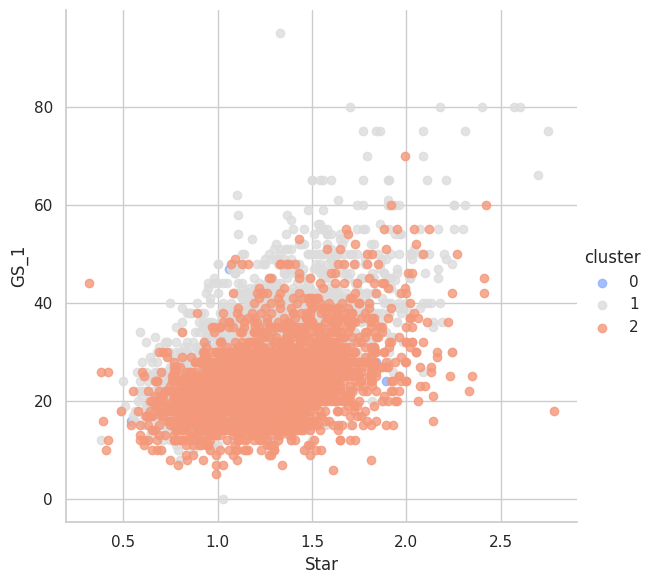

In [144]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Star',y = 'GS_1', data=df_analyze, hue= 'cluster', palette = 'coolwarm', height = 6, aspect =1, fit_reg = False)

In [ ]:
'MMSE', Mini-Mental State Examination, a test used to assess cognitive impairment and dementia
'Waist', waist circumference
'Hip', hip circumference
'DM', individual has diabetes or not
'DM_Duration', length of time the individual has had diabetes
'Insulin', Is individual taking insulin
'DM_Drug', medications or drugs used to manage diabetes
'Dyslipidemia', cholesterol levels
'Statin', statin medications to manage dyslipidemia
'KAH', coronary artery disease
'Hipotiroidi', underactive thyroid gland
'KOAH', Chronic Obstructive Pulmonary Disease (Kronik Obstrüktif Akciğer Hastalığı)
'OP', osteoporosis (Kemik Erimesi)
'HT', high blood pressure
'N_HT', number of medications or drugs taken for hypertension???
'1HT_Duration', duration of time since the first diagnosis of hypertension.???
'Status', Maritial Status
'Egz', exercise or physical activity indicator
'AT', ???
'CST', CHAIR STAND TEST??
'GS', Gait speed(walk test)
'GS_1', grip strength
'Star', sonographic thigh adjustment ratio
'BMI', Body Mass Index
'OP', Osteoporosis